In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
from scipy.interpolate import interp1d
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.mlab import griddata
from datetime import datetime

In [2]:
θ = np.load('theta1.npy')
tols = np.load('tols1.npy')

/home/emma/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


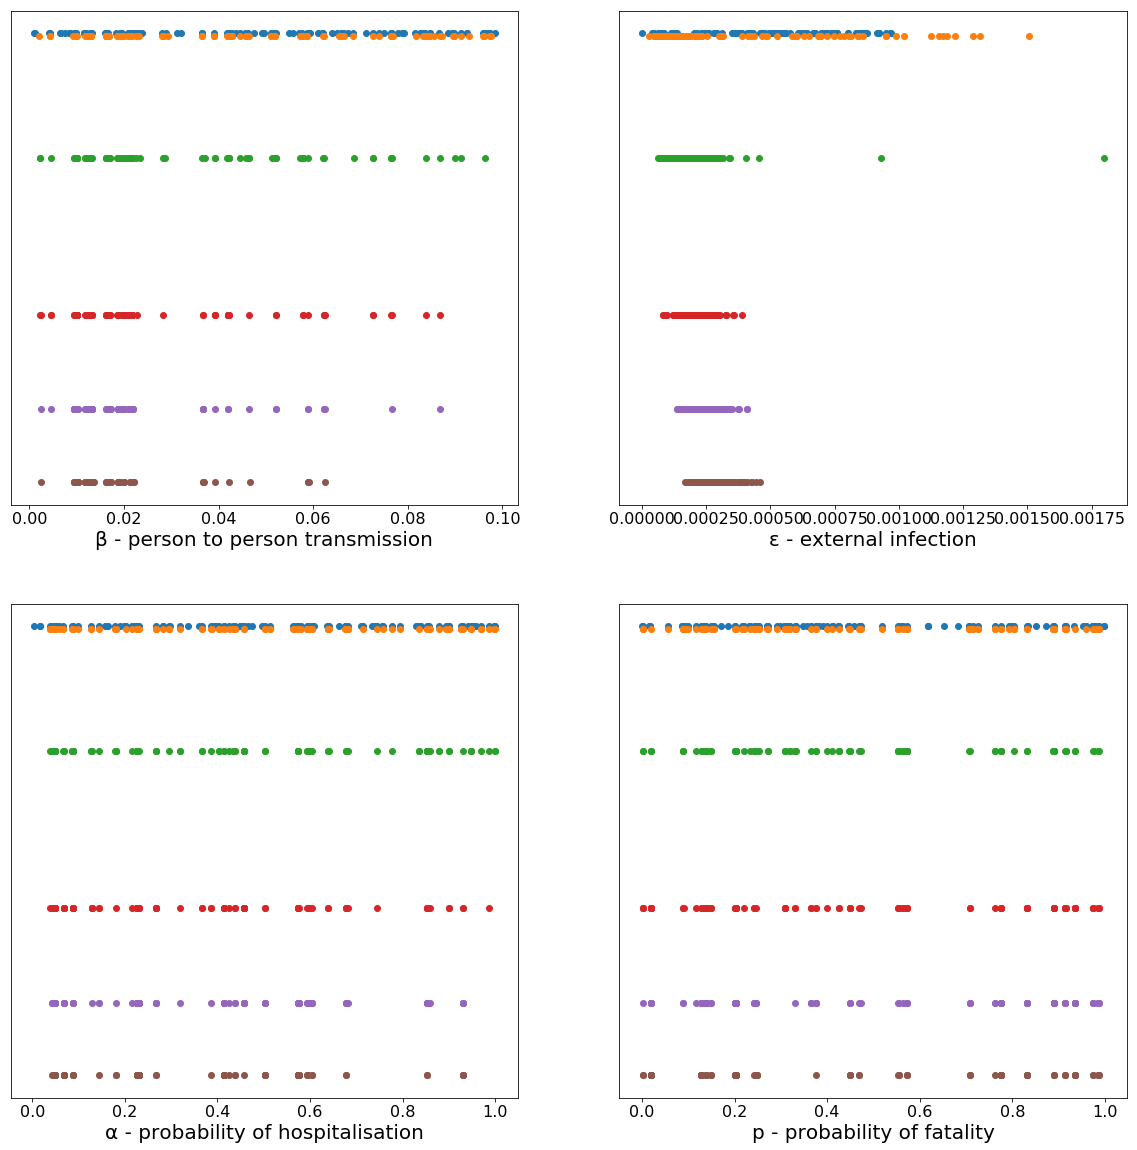

In [3]:
plt.figure(figsize = (20,20))
# tol = 6
for i in range(6):
    plt.subplot(2,2,1)
    plt.plot(θ[i][:,0], tols[i]*np.ones(100), 'o' )
    plt.xlabel('β - person to person transmission', fontsize = 20)
    plt.yticks([])
    plt.xticks(fontsize = 16)
    
    plt.subplot(2,2,2)
    plt.plot(θ[i][:,1], tols[i]*np.ones(100), 'o' )
    plt.xlabel('ɛ - external infection', fontsize = 20)
    plt.yticks([])
    plt.xticks(fontsize = 16)

    plt.subplot(2,2,3)
    plt.plot(θ[i][:,2], tols[i]*np.ones(100), 'o' )
    plt.xlabel('α - probability of hospitalisation', fontsize = 20)
    plt.yticks([])
    plt.xticks(fontsize = 16)

    plt.subplot(2,2,4)
    plt.plot(θ[i][:,3], tols[i]*np.ones(100), 'o' )
    plt.xlabel('p - probability of fatality', fontsize = 20)
    plt.yticks([])        
    plt.xticks(fontsize = 16)

/home/emma/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'ɛ')

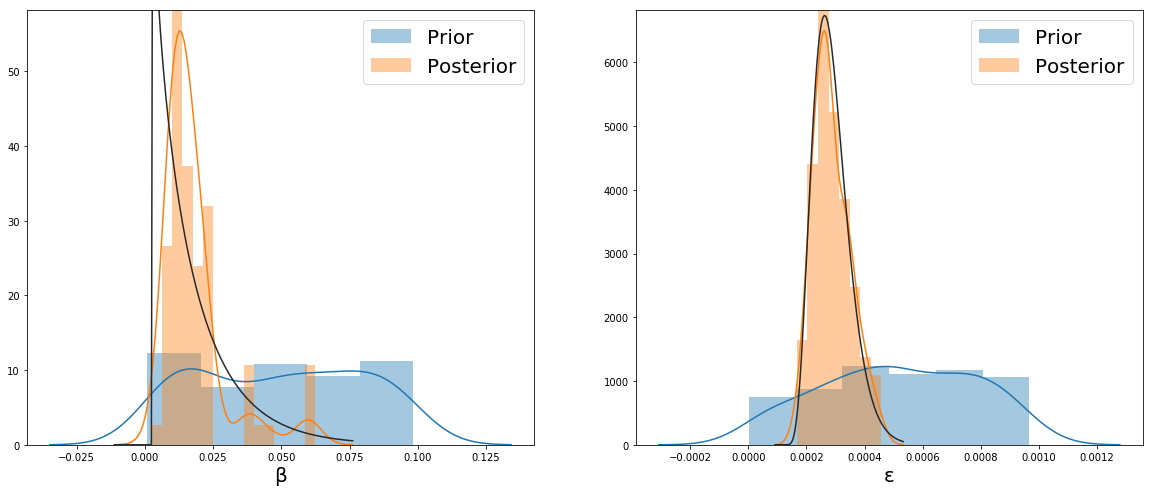

In [5]:
from scipy import stats
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(θ[0][:,0],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot(θ[5][:,0],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.legend(fontsize = 20)
# plt.ylim([0, 100])
# plt.xlim([0,0.15])
plt.xlabel('β', fontsize = 20)

plt.subplot(1,2,2)
sns.distplot(θ[0][:,1], kde=True,  norm_hist=False, label = 'Prior')
sns.distplot(θ[5][:,1], kde=True,  fit=stats.gamma,  norm_hist=False, label = 'Posterior')
plt.legend(fontsize = 20)
# plt.ylim([0, 15000])

plt.xlabel('ɛ', fontsize = 20)

/home/emma/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'p')

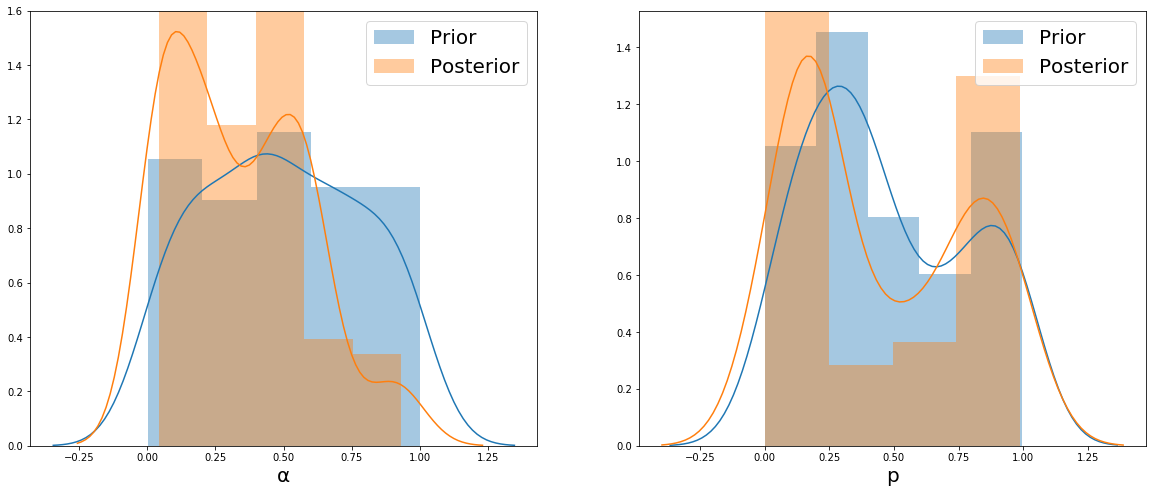

In [6]:
from scipy import stats
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(θ[0][:,2],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot(θ[5][:,2],  kde=True,  norm_hist=False,  label = 'Posterior')
plt.legend(fontsize = 20)
# plt.ylim([0, 100])
# plt.xlim([0,0.15])
plt.xlabel('α', fontsize = 20)

plt.subplot(1,2,2)
sns.distplot(θ[0][:,3], kde=True,  norm_hist=False, label = 'Prior')
sns.distplot(θ[5][:,3], kde=True,  norm_hist=False, label = 'Posterior')
plt.legend(fontsize = 20)
# plt.ylim([0, 15000])

plt.xlabel('p', fontsize = 20)

## Contour Plot of Joint Distribution 

major/minor axes that are parallel/perpendicular to the x-axis --> independent 

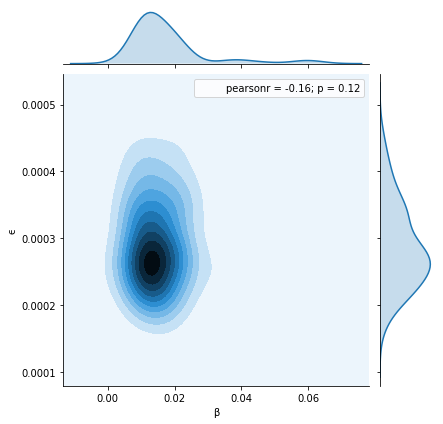

In [7]:
d = {'β': θ[5][:,0], 'ϵ': θ[5][:,1], 'α': θ[5][:,2], 'p': θ[5][:,3]}
df = pd.DataFrame(data = d)
sns.jointplot(x="β", y="ϵ", data=df, kind="kde"); 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/home/emma/.local/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


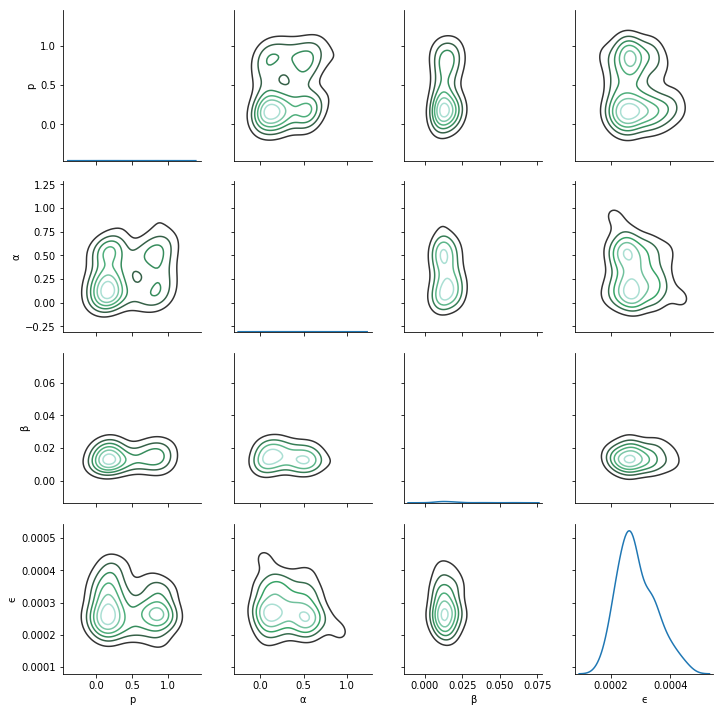

In [9]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6); #pretty much all independent 

# Draw from posterior -- plots of predictions 

In [12]:
#####################################################################################
############################### DATASETS ############################################
#####################################################################################

Data_F04=pd.read_csv("../Case_data/2004_F_cases.csv",sep = ',', header = 0)
############################# Spacing ##############################################
date_format = "%d/%m/%y"


def Spacing(dataset):
    record = []
    record.append(datetime.strptime(dataset['Date'][0], date_format).day)
    for i in range(1, len(dataset)):
        record.append(record[i-1]+(datetime.strptime(dataset['Date'][i], date_format)-datetime.strptime(dataset['Date'][i-1], date_format)).days) 
    record = [int(a - record[0]) for a in record]
    return record

Rec_F04=Spacing(Data_F04)

In [56]:
Rec_F04
# Input_H

[0, 14, 16, 19, 26, 29, 34, 35, 36, 39, 40, 41, 42, 43, 45, 53, 54, 55, 56, 57]

In [13]:
μ1 = 1/21 #14 days infectious
μ2 = 1/5 #5 days (14 - 9 days)
σ =1/5 #5 days exposed
ω=1/9 # 9 days until emitted to hospital
capT = 10000
γ = 1/(80*365)
Input_H = [1500,1,0,0,0]

In [14]:
def gillespieSEIHR(initial, beta, mu1,mu2, sigma, omega, alpha, epsilon, mort,  max_time):
    event_time = []
    pop = []
    N = sum(initial)
    pop.append(initial)
    event_time.append(0)
    times = 0
    ind = 0
    cuminf = []
    cuminf.append(0)
    events = []
    while times <max_time and (pop[ind][1]+pop[ind][2]+pop[ind][3]>0):
        state = np.zeros(shape= (5,12))
        
        ####################################################################################
        #################################### EVENTS ########################################
        ####################################################################################
        
        
        R_se = beta*(pop[ind][0])*(pop[ind][2] + alpha*pop[ind][3])/N + epsilon*pop[ind][0] 
        state[:,0] = [-1, 1, 0, 0,0]
        
        R_ei = sigma*pop[ind][1]
        state[:,1] = [0, -1, 1, 0,0]
        
        R_ih = omega*pop[ind][2]
        state[:,2] = [0, 0, -1, 1, 0]
        
        R_ir = mort*mu1*pop[ind][2]
        state[:,3] = [0,0,-1,0,1]
        
        R_hr = mort*mu2*pop[ind][3]
        state[:,4] = [0,0,0,-1,1]

        R_is = (1-mort)*mu1*pop[ind][2]
        state[:,5] = [1,0,-1,0,0]

        R_hs = (1-mort)*mu2*pop[ind][3]
        state[:,6] = [1,0,0,-1,0]
        
        rate = [R_se, R_ei, R_ih, R_ir, R_hr, R_is, R_hs]

        Rtotal = sum(rate)
        delta_t= -np.log(np.random.uniform(0,1))/Rtotal
        P = np.random.uniform(0,1)*Rtotal
        times =times+ delta_t
        event = np.min(np.where(P<=np.cumsum(rate)))
        events.append(event)
        event_time.append(times)
        pop.append(pop[ind]+state[:,event])
        

        if event == 1:
            cuminf.append(1 + cuminf[ind] )
        else:
            cuminf.append(0 +cuminf[ind])
        ind=ind+1
        N = sum(pop[ind][:5])
    return event_time, np.array(pop), events, cuminf

In [50]:
parameters = [Input_H, μ1, μ2, σ, ω, 1, capT]
r_β = np.random.randint(0, 99)
r_ϵ = np.random.randint(0,99)
r_α = np.random.randint(0,99)
r_p = np.random.randint(0,99)
r = np.random.randint(0,99)
betas = θ[5][:,0]
eps = θ[5][:,1]
alphas = θ[5][:,2]
pps = θ[5][:,3]

In [41]:
betas[r_β]
alphas[r_α]
eps[r_ϵ]
pps[r_p]

0.12789926727096995

In [31]:
 Data_F04['CumsumInf'].values

array([ 1,  2,  3,  4,  5,  6,  7,  9, 11, 12, 14, 17, 26, 27, 28, 31, 33,
       34, 35, 36])

In [53]:
M =gillespieSEIHR(parameters[0], betas[r], parameters[1],parameters[2],
                      parameters[3], parameters[4], alphas[r],eps[r],pps[r],  parameters[6])
time = [] #make results of M a step function
cuminf = [] #steps
for ind, x in enumerate(M[0]):
    if ind < len(M[0])-1:
        time.append((M[0][ind], M[0][ind+1]))
        cuminf.append((M[3][ind], M[3][ind]))
time = np.array(time).flatten()
cuminf = np.array(cuminf).flatten()
max_inf = max(cuminf)
max_time = math.ceil(max(time))
#     print(max_inf, max_time, βt, ɛt)


summary_time = Rec_F04
#         print(summary_time, max(summary_time[0]), max_time)
summary_cum = Data_F04['CumsumInf'].values
if max_time> max(summary_time):
    length1 =  np.arange(max(summary_time), max_time +1, 1)
    summary_time = np.append(summary_time, length1)
#         print(summary_time, len( length1))
    summary_cum = np.append(summary_cum, max( Data_F04['CumsumInf'].values)*np.ones(len(length1 )))
#         print(summary_cum)
if max_time < max(summary_time):
    length2 = np.arange(max_time, max(summary_time)+1, 1)
    time = np.append(time,length2)
    cuminf = np.append(cuminf, max_inf*np.ones(len(length2)))

inter_t = np.arange(0, max(summary_time) +1 , 1) #interpolate to daily steps
inter_cum = np.interp(inter_t, time,cuminf) #daily steps

#         print(summary_time, summary_cum)
print(np.linalg.norm(summary_cum-inter_cum[summary_time]),  betas[r_β],alphas[r_α],eps[r_ϵ],pps[r_p])

154030.07742645591 0.013489864106683095 0.2263171465796076 0.00026142065509463983 0.20171235606577897


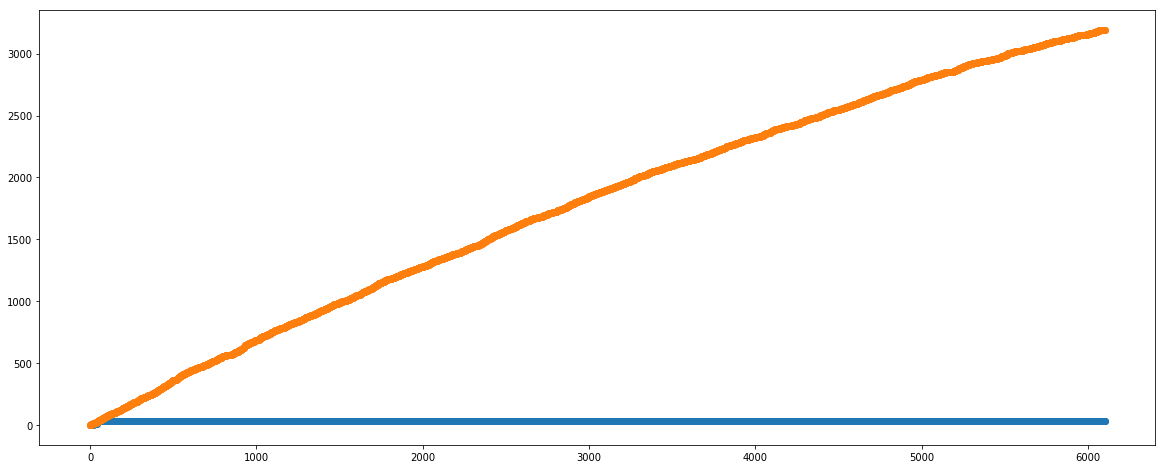

In [54]:
plt.figure(figsize = (20,8))
plt.plot(summary_time, summary_cum, 'o')
plt.plot(inter_t, inter_cum, 'o')